# Data 8 Extra Lecture 2 – Multiple Regression DEMO


In [25]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Some helper functions for our standard line of best fit
def std_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(std_units(x) * std_units(y))

def slope_and_intercept(x, y):
    a = correlation(x, y) * np.std(y) / np.std(x)
    b = np.mean(y) - a * np.mean(x)
    return a, b

In [27]:
data = Table().read_table('USvideos.csv')
data.show()

In [28]:
# We only care about these four columns
data = data.select('views', 'likes', 'dislikes', 'comment_count')
data

views   | likes  | dislikes | comment_count
748374  | 57527  | 2966     | 15954
2418783 | 97185  | 6146     | 12703
3191434 | 146033 | 5339     | 8181
343168  | 10172  | 666      | 2146
2095731 | 132235 | 1989     | 17518
119180  | 9763   | 511      | 1434
2103417 | 15993  | 2445     | 1970
817732  | 23663  | 778      | 3432
826059  | 3543   | 119      | 340
256426  | 12654  | 1363     | 2368
... (2990 rows omitted)

Text(0,0.5,'number of views')

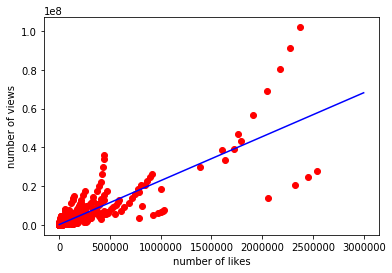

In [29]:
# Let's draw our line of best fit, using likes to predict views
views = data.column('views')
likes = data.column('likes')

slope, intercept = slope_and_intercept(likes, views)

plt.scatter(likes, views, color='red')
plt.plot([0, 3*10**6], [intercept, slope*(3*10**6) + intercept], color="blue")
plt.xlabel('number of likes')
plt.ylabel('number of views')

In [30]:
# Implementing the matrix form of the least squares estimator
def least_squares_estimate(X, b):
    # X - matrix
    # b - array
    return np.linalg.inv(X.T * X) * (X.T * np.matrix(b).T)

In [31]:
# Now, let's use likes, dislikes and comments to do regression
dislikes = data.column('dislikes')
comments = data.column('comment_count')

X = np.matrix([likes, dislikes, comments, [1 for _ in range(len(likes))]]).T
X

matrix([[ 57527,   2966,  15954,      1],
        [ 97185,   6146,  12703,      1],
        [146033,   5339,   8181,      1],
        ..., 
        [  1614,     44,    260,      1],
        [119787,   1975,  10218,      1],
        [  4667,    187,    281,      1]])

In [32]:
a = least_squares_estimate(X, views)
print("(estimated views) = " + str(float(a[0])) + " * (likes) + " + str(float(a[1])) + " * (dislikes) + " + str(float(a[2])) + " * (comments) + " + str(float(a[3])))

(estimated views) = 20.873607669738846 * (likes) + 333.79267081009266 * (dislikes) + -74.22131588811348 * (comments) + 111868.73738180625


In [33]:
# COMPARE TOTAL SQUARED ERROR
error_likes_only = np.sum((views - (slope * likes + intercept))**2)
error_three_attributes = np.sum((views - np.array((X*a).T)[0])**2)
print("Total squared error, using likes only: ", error_likes_only)
print("Total squared error, using likes, dislikes and comments: ", error_three_attributes)

Total squared error, using likes only:  1.66174068407e+16
Total squared error, using likes, dislikes and comments:  7.79596919545e+15


In [34]:
# We can't visualize a line with three independent variables, as we'd need 4D to do that
# Let's simplify this to using two independent variables – likes and dislikes – and visualize this

X_likes_comments = np.matrix([likes, dislikes, [1 for _ in range(len(likes))]]).T
a_likes_comments = least_squares_estimate(X_likes_comments, views)
print("(estimated views) = " + str(float(a_likes_comments[0])) + " * (likes) + " + str(float(a_likes_comments[1])) + " * (dislikes) + " + str(float(a_likes_comments[2])))



(estimated views) = 11.497421801074793 * (likes) + 392.0672080751901 * (dislikes) + 91011.51283210228


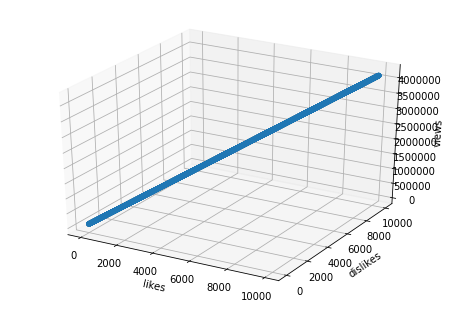

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

likes_axis = list(range(0, 10**4))
dislikes_axis = list(range(0, 10**4))
views_axis = a_likes_comments[0] * likes_axis + a_likes_comments[1] * dislikes_axis + a_likes_comments[2]

ax.scatter(likes_axis, dislikes_axis, views_axis)
ax.set_xlabel('likes')
ax.set_ylabel('dislikes')
ax.set_zlabel('views')
plt.show()